# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-danger">

<b>Comentário geral V1: </b> <a class="tocSkip"></a>


Parabéns pela conclusão do projeto, Bruno! 🎉

O seu trabalho já demonstra excelente qualidade! Como comentários positivos, destaco: 
    
    
- Código organizado e com comentários em cada etapa
- Boa análise crítica dos dados 
    
    
Para concluirmos a aprovação, precisamos fazer alguns ajustes. O ajuste principal é:

    - Análise de taxa de retenção
    - LTV por coortes
    - Taxa de ROI por coortes
    
    
    
    
Incluí comentários ao longo do código para te auxiliar nessa tarefa.
    
    
    

Fico à disposição para eventuais dúvidas. 

Boa sorte! 🍀
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral V2: </b> <a class="tocSkip"></a>

Muito obrigada pelos ajustes realizados até agora, Bruno! A LTV por coortes está correta agora! Parabéns! ☺️

Ainda precisamos de ajustes na: 

    - Taxa de retenção 
    - Taxa de ROI por coortes 

Adicionei comentários com final V2 para te auxiliar na resolução. Não esqueça que estou aqui para qualquer dúvida que surgir!

Boa sorte!🍀

In [73]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [74]:
visits = pd.read_csv('/datasets/visits_log_us.csv')

In [75]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [76]:
visits['Device'] = visits['Device'].astype('category')



In [77]:
# vou ajustar as colunas com datas

In [78]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')
visits['End Ts'] = pd.to_datetime(visits['End Ts'], format='%Y-%m-%d %H:%M:%S')

In [79]:
visits['day'] = visits['Start Ts'].dt.date
visits['week']  = visits['Start Ts'].dt.week
visits['month'] = visits['Start Ts'].dt.to_period('M')
visits['year']  = visits['Start Ts'].dt.year


In [80]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12,2017


<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- Os dados foram carregados corretamente.
- Foram utilizados comandos como `head()`e `info()`.
</div>

In [81]:
visits.groupby('Device')['Uid'].nunique()

Device
desktop    164523
touch       71345
Name: Uid, dtype: int64

In [82]:
# Podemos ver que mais visitas dos clientes são feitas pelo Desktop

In [83]:
visits.dtypes


Device             category
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
day                  object
week                  int64
month             period[M]
year                  int64
dtype: object

In [84]:
dau = visits.groupby('day').agg({'Uid': 'nunique'}).mean()
wau = visits.groupby(['year', 'week']).agg({'Uid': 'nunique'}).mean()
mau = visits.groupby('month')['Uid'].nunique().mean()
yau = visits.groupby('year')['Uid'].nunique().mean()

In [85]:
dau.round(1)

Uid    908.0
dtype: float64

In [86]:
wau.round(1)

Uid    5716.2
dtype: float64

In [87]:
mau

23228.416666666668

In [88]:
# é a média mensal de usuários distintos (Uid) que acessaram o produto

In [89]:
yau

122156.0

In [90]:
sessions_daily = visits.groupby('Start Ts')['Uid'].nunique()
print("Quantidade de sessões por tempo:\n", sessions_daily.head())

Quantidade de sessões por tempo:
 Start Ts
2017-06-01 00:01:00    1
2017-06-01 00:02:00    2
2017-06-01 00:04:00    1
2017-06-01 00:09:00    1
2017-06-01 00:14:00    3
Name: Uid, dtype: int64


In [91]:
dau/mau

Uid    0.03909
dtype: float64

In [92]:
# em média, cerca de 3,9% dos usuários mensais ativos estão ativos diariamente.

In [93]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [94]:
# Código para o Primeiro acesso por usuário
first_visit_month = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visit_month= first_visit_month.rename(columns={"Start Ts":'first_visit_date'})  
first_visit_month


,Uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [95]:
first_visit_month['first_visit_date'] = pd.to_datetime(first_visit_month['first_visit_date'], format='%Y-%m-%d %H:%M:%S')


In [96]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12,2017


In [97]:
visits = visits.merge(first_visit_month, on='Uid',how="left")


<div class="alert alert-block alert-danger">

<b>Comentário v2: </b> <a class="tocSkip"></a>

O erro acima ocorreu pois não existe variável com o nome `first_visit_date`. Por favor adapte o código com a variável correspondente.

In [98]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month,year,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12,2017,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02,2018,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07,2017,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12,2017,2017-12-27 14:06:00


In [99]:
visits['first_visit_date'] = visits['first_visit_date'].dt.to_period('M')

In [100]:
visits['lifetime'] = (visits['month'] - visits['first_visit_date']).apply(lambda x: x.n)

In [101]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid,day,week,month,year,first_visit_date,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12,2017,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02,2018,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07,2017,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12,2017,2017-12,0


In [102]:
# Calcula a coorte de usuários por mês de primeira visita e tempo de vida
cohort = visits.groupby(['first_visit_date', 'lifetime']).agg({'Uid': 'nunique'}).reset_index()


In [103]:
# Seleciona a coorte inicial (lifetime == 0) e renomeia a coluna de contagem de usuários
inicial = cohort[cohort['lifetime'] == 0][['first_visit_date', 'Uid']]
inicial = inicial.rename(columns={'Uid': 'users'})


In [104]:
# Junta a coorte inicial com a coorte completa e calcula a taxa de retenção
cohort = cohort.merge(inicial, on='first_visit_date')
cohort['retention'] = cohort['Uid'] / cohort['users']



In [105]:
# Cria uma tabela dinâmica de retenção por mês de primeira visita e tempo de vida
retention_pivot = cohort.pivot_table(index='first_visit_date', columns='lifetime', values='retention', aggfunc='sum')


In [106]:
retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_date,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


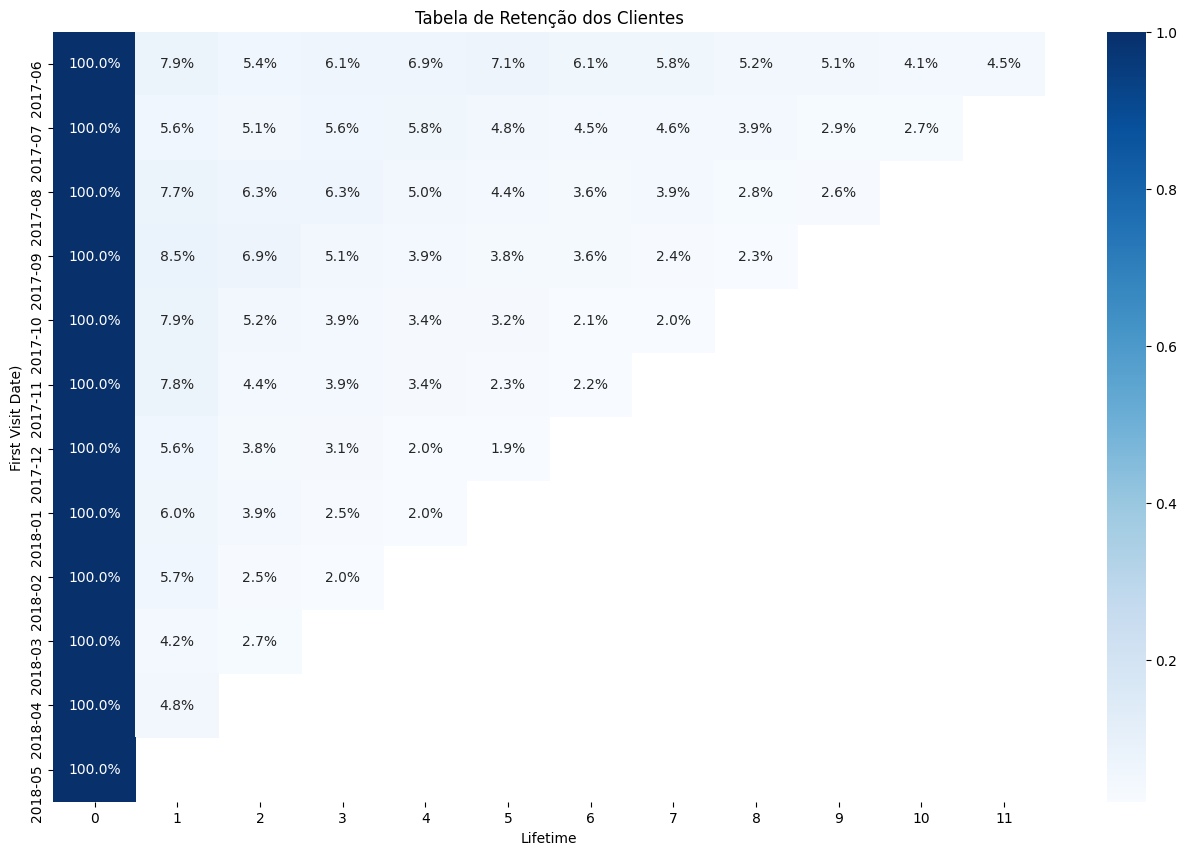

In [107]:
plt.figure(figsize=(16, 10))
sns.heatmap(retention_pivot, annot=True, fmt=".1%", cmap="Blues")
plt.title('Tabela de Retenção dos Clientes')
plt.xlabel('Lifetime')
plt.ylabel('First Visit Date)')
plt.show()

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>
    
    
A taxa de retenção está quase correta, precisamos de alguns ajustes.

O passo a passo é o seguinte:
    
1. Você precisa pegar a data do primeiro acesso de cada usuário
2. Para calcular o intervalo ou cohort de acesso para cada usuário, você precisa calcular o intervalo entre o acesso atual e o primeiro acesso:</s>
3. A partir desses dados, você pode criar uma tabela dinâmica (`pivot_table`) que indexa por cada mês do conjunto de dados e calcula a quantidade de usuários que teve o primeiro acesso naquele mês e voltou a acessar no futuro (`cohort`): 1 mês depois, 2 meses depois, etc. 


Exemplo: 

```python

# Calcula a vida útil de cada visita em meses
df_visits['lifetime'] = (df_visits['month'] - df_visits['first_month']).apply(lambda x: x.n)

# Calcula a coorte de usuários por mês de primeira visita e tempo de vida
cohort = df_visits.groupby(['first_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()

# Seleciona a coorte inicial (lifetime == 0) e renomeia a coluna de contagem de usuários
inicial = cohort[cohort['lifetime'] == 0][['first_month', 'uid']]
inicial = inicial.rename(columns={'uid': 'users'})

# Junta a coorte inicial com a coorte completa e calcula a taxa de retenção
cohort = cohort.merge(inicial, on='first_month')
cohort['retention'] = cohort['uid'] / cohort['users']

# Cria uma tabela dinâmica de retenção por mês de primeira visita e tempo de vida
retention_pivot = cohort.pivot_table(index='first_month', columns='lifetime', values='retention', aggfunc='sum')

# Imprime a tabela de retenção
print(retention_pivot)
```

O output esperado deve ser semelhante a esse: 
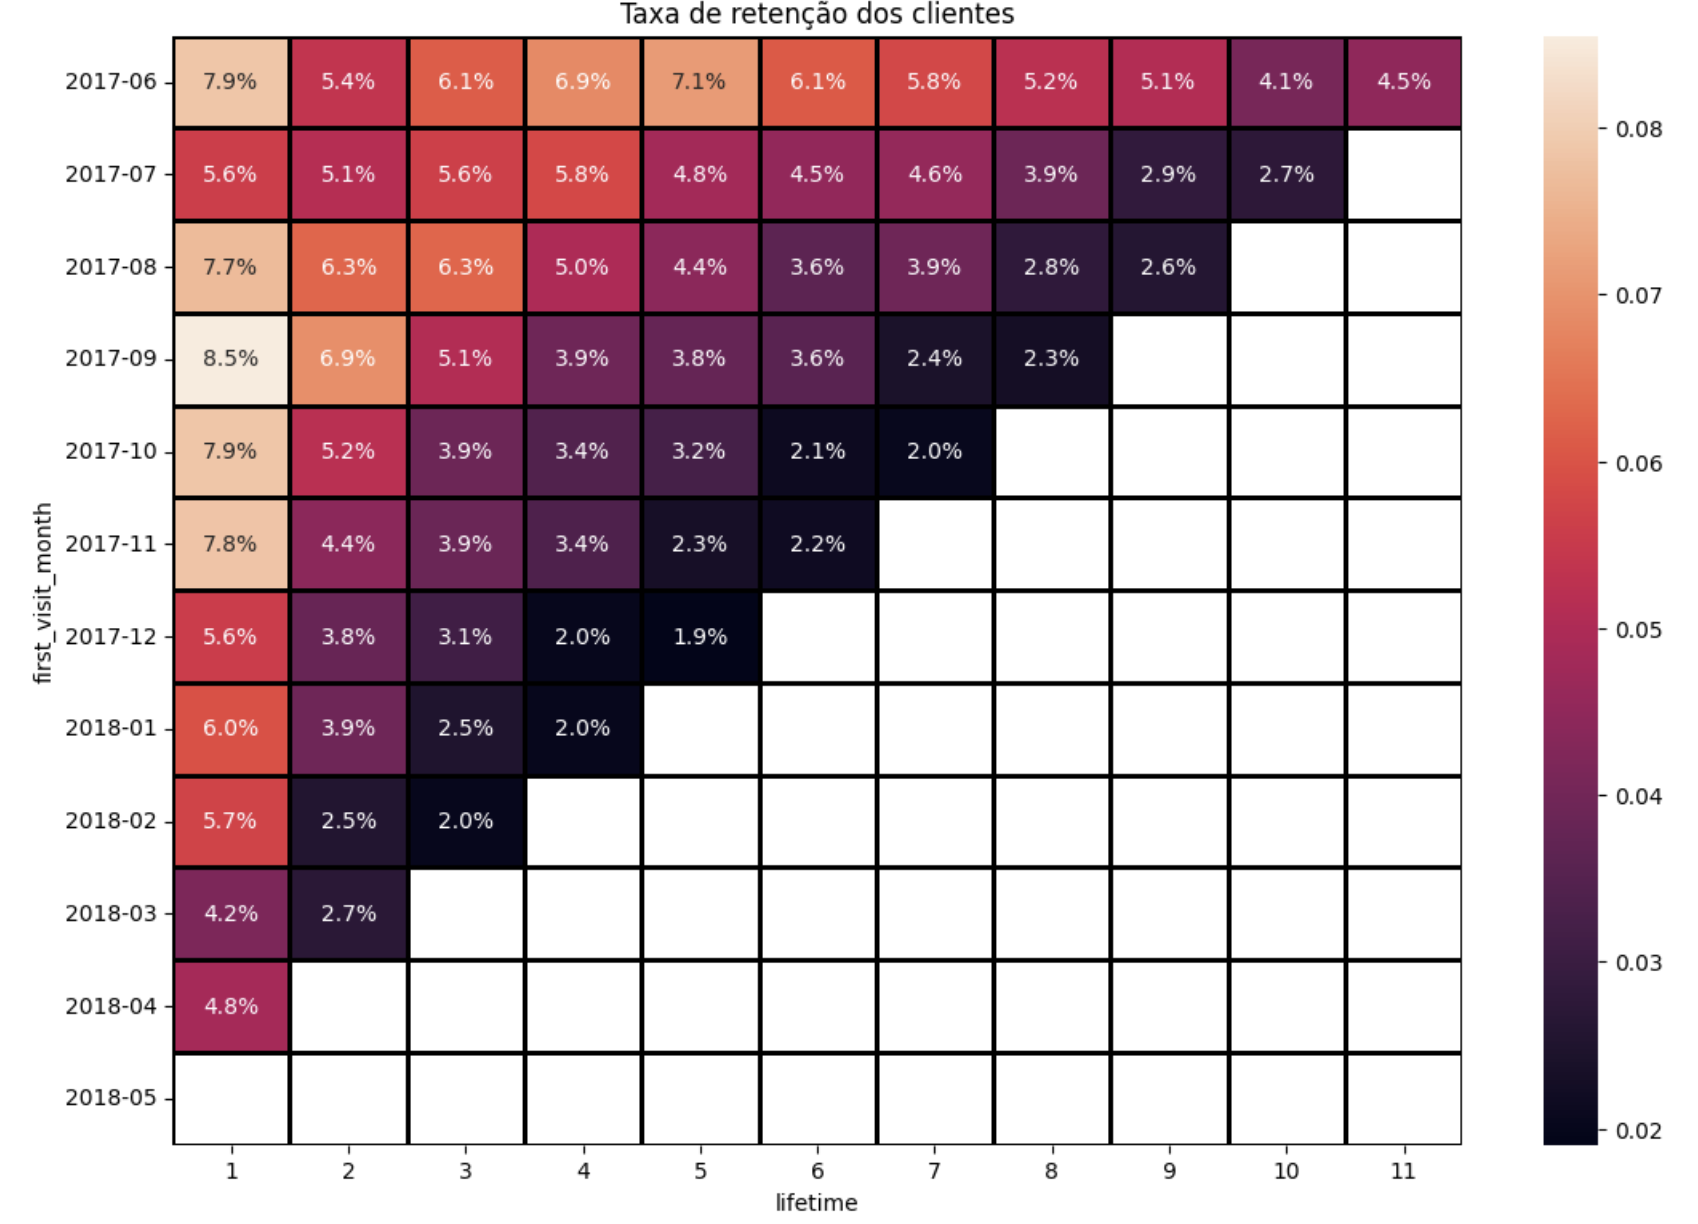
</div>

In [108]:
orders = pd.read_csv('/datasets/orders_log_us.csv')

In [109]:
orders.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [110]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')


In [111]:
orders.dtypes

Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

In [112]:
first_purchase = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase

,Uid,Buy Ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [113]:
first_purchase['Buy Ts'] = first_purchase['Buy Ts'].dt.date

In [114]:
conversion = pd.merge(first_visit_month, first_purchase, on='Uid')


In [115]:
conversion.head()

,Uid,first_visit_date,Buy Ts
0,313578113262317,2017-09-18 22:49:00,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-24


In [116]:
conversion['Buy Ts'] = pd.to_datetime(conversion['Buy Ts'])
conversion['first_visit_date'] = pd.to_datetime(conversion['first_visit_date'])


In [117]:
conversion.head(5)

,Uid,first_visit_date,Buy Ts
0,313578113262317,2017-09-18 22:49:00,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03
2,2429014661409475,2017-10-11 17:14:00,2017-10-11
3,2464366381792757,2018-01-27 20:10:00,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-24


In [118]:
conversion["conversion_days"] = (conversion["Buy Ts"] - conversion['first_visit_date']).dt.days

In [119]:
conversion.head()

,Uid,first_visit_date,Buy Ts,conversion_days
0,313578113262317,2017-09-18 22:49:00,2018-01-03,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,-1
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,-1
3,2464366381792757,2018-01-27 20:10:00,2018-01-28,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,-1


In [120]:

# Criando a coluna 'order_month' a partir da coluna 'buy_ts' que contém a data de compra
orders['order_month'] = orders['Buy Ts'].dt.to_period('M')


In [121]:
# Primeira Compra
orders['first_order_month'] = orders.groupby('Uid')['order_month'].transform('min')

In [122]:
orders.head()

,Buy Ts,Revenue,Uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06


In [123]:
# Calculando a diferença em meses entre a compra atual e a primeira compra
orders['month_diff'] = (orders['order_month'].astype('int64') - orders['first_order_month'].astype('int64'))

In [124]:
# Calculando o número de compradores por coorte
cohort_sizes = orders.groupby('first_order_month')['Uid'].nunique().reset_index()
cohort_sizes.rename(columns={'Uid': 'n_buyers'}, inplace=True)

In [125]:
cohort_sizes.head(5)

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [126]:
# Mesclando o DataFrame de cohort sizes com orders
orders = pd.merge(orders,cohort_sizes, left_on='first_order_month', right_on='first_order_month')

In [127]:
orders.head()

,Buy Ts,Revenue,Uid,order_month,first_order_month,month_diff,n_buyers
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06,0,2023
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06,0,2023
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06,0,2023
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06,0,2023
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06,0,2023


In [128]:
# Calculando o LTV para cada coorte e período de tempo (em meses) após a primeira compra
orders['ltv'] = orders['Revenue'] / orders['n_buyers']

In [129]:
# Criando a Tabela Dinâmica
output = orders.pivot_table(
    index='first_order_month',
    columns= 'month_diff',
    values= 'ltv',
    aggfunc='sum'
)

In [130]:
output

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# Calculando o LTV acumulado ao longo do tempo para cada coorte
ltv_cumsum = output.cumsum(axis=1).round(2)

In [132]:
ltv_cumsum.head(5)

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN


In [133]:
# Substituindo strings vazias por NaN
ltv_cumsum.replace('', np.nan, inplace=True)

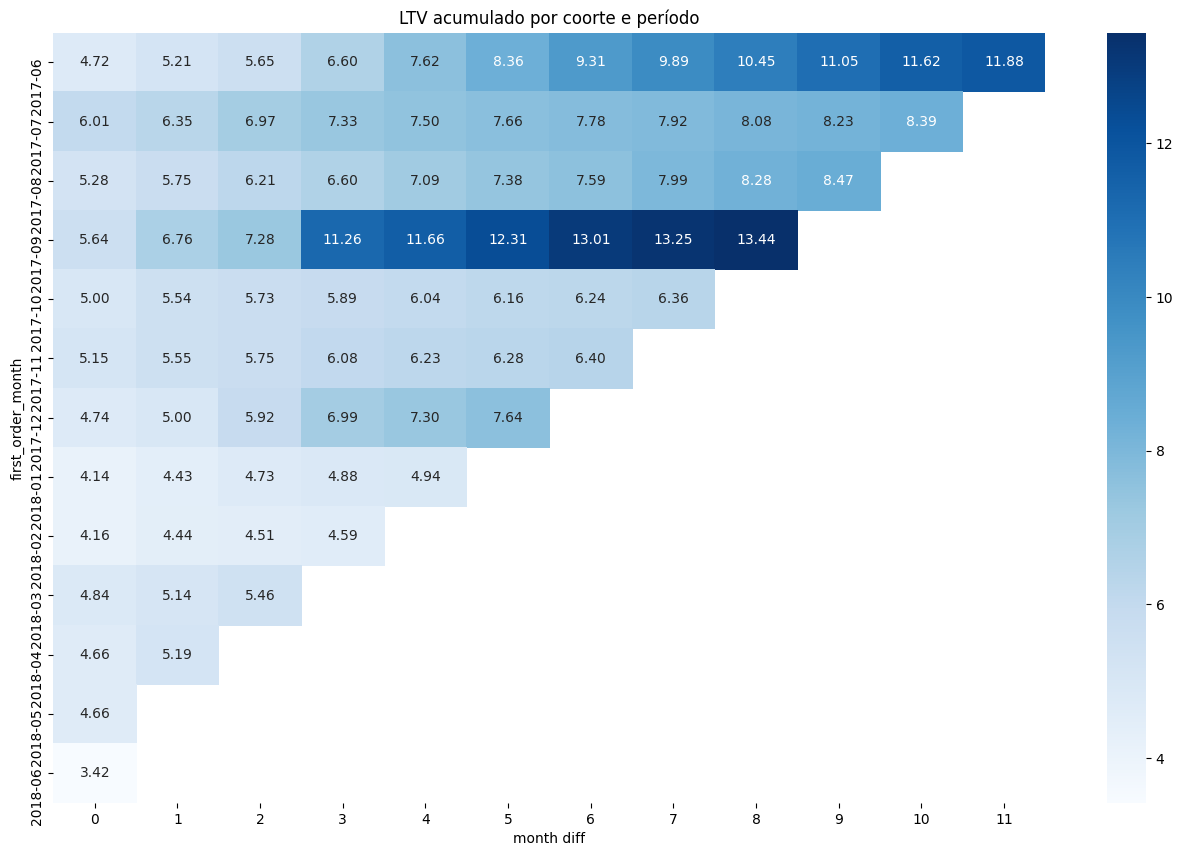

In [134]:
plt.figure(figsize=(16, 10))
sns.heatmap(ltv_cumsum, annot=True, fmt=".2f", cmap="Blues")
plt.title('LTV acumulado por coorte e período')
plt.xlabel('month diff')
plt.ylabel('first_order_month')
plt.show()

In [135]:
avg_order_value = orders['Revenue'].mean()

In [136]:
print("Ticket Médio =", avg_order_value)

Ticket Médio = 4.999646930477041


In [137]:
# Receita total
total_revenue = orders['Revenue'].sum()
print("Receita Total =","$",total_revenue.round())

Receita Total = $ 252057.0


In [138]:
# Receita total por usuário
revenue_per_user = orders.groupby('Uid')['Revenue'].sum().reset_index()
revenue_per_user.head(5)

,Uid,Revenue
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99


In [139]:
# LTV médio
ltv = revenue_per_user.mean()
print("LTV médio =", "$",ltv.round(2))

LTV médio = $ Uid        9.213152e+18
Revenue    6.900000e+00
dtype: float64


In [140]:
total_clients = first_purchase['Uid'].nunique()

ltv_overall = total_revenue / total_clients
print(f"LTV geral: ${ltv_overall:.2f}")

LTV geral: $6.90


<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>
<s>  
A análise LTV necessita de ajustes. 

Adiciono abaixo um passo a passo mais detalhado para a resolução do problema:
    
Passo 1: Criar Coluna de Mês do Pedido
Primeiro, criamos uma nova coluna em nosso DataFrame que representa o mês de cada compra.

```python

# Criando a coluna 'order_month' a partir da coluna 'buy_ts' que contém a data de compra
df_logs['order_month'] = df_logs['buy_ts'].dt.to_period('M')
```
Passo 2: Identificar o Mês da Primeira Compra
Em seguida, encontramos o mês da primeira compra para cada usuário.

```python
# Primeira Compra
first_order_month = df_logs.groupby("uid")['order_month'].min().reset_index().rename(columns={'order_month': 'first_order_month'})
```
Passo 3: Mesclar Dados de Primeira Compra com o DataFrame Original
Agora, mesclamos o DataFrame original com o DataFrame que contém a data da primeira compra de cada usuário.

```python
# Mesclando o DataFrame original com o DataFrame que contém a data da primeira compra de cada usuário
cohort = pd.merge(df_logs, first_order_month, on='uid')
```
Passo 4: Calcular Diferença em Meses
Calculamos a diferença em meses entre o mês da compra atual e o mês da primeira compra.

```python
# Calculando a diferença em meses entre a compra atual e a primeira compra
cohort['month_diff'] = (cohort['order_month'].astype('int64') - cohort['first_order_month'].astype('int64'))
```
Passo 5: Calcular o Número de Compradores por Coorte
Agora, calculamos quantos compradores existem em cada coorte.

```python
# Calculando o número de compradores por coorte
cohort_sizes = cohort.groupby('first_order_month')['uid'].nunique().reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
```
Passo 6: Mesclar Tamanhos de Coorte com o DataFrame

Mesclamos o DataFrame de tamanhos de coorte com o DataFrame principal para obter as informações de compradores.

```python
# Mesclando o DataFrame de cohort sizes com o DataFrame original
cohort = pd.merge(cohort, cohort_sizes, left_on='first_order_month', right_on='first_order_month')
```
Passo 7: Calcular LTV
Agora podemos calcular o LTV dividindo a receita pela quantidade de compradores para cada coorte.

```python
# Calculando o LTV para cada coorte e período de tempo (em meses) após a primeira compra
cohort['ltv'] = cohort['revenue'] / cohort['n_buyers']
```
Passo 8: Criar uma Tabela Dinâmica
Criamos uma tabela dinâmica para organizar os dados de LTV.

```python
# Criando a Tabela Dinâmica
output = cohort.pivot_table(
    index='first_order_month',
    columns='month_diff',
    values='ltv',
    aggfunc='sum'
)
```
Passo 9: Calcular LTV Acumulado
Calculamos o LTV acumulado ao longo do tempo para cada coorte.

```python
# Calculando o LTV acumulado ao longo do tempo para cada coorte
ltv_cumsum = output.cumsum(axis=1).round(2)
```
Passo 10: Substituir Strings Vazias por NaN
Substituímos as strings vazias por NaN para evitar problemas na visualização.

```python

# Substituindo strings vazias por NaN
ltv_cumsum.replace('', np.nan, inplace=True)
```
Passo 11: Gerar o Heatmap
Por fim, geramos um heatmap para visualizar o LTV acumulado por coorte e período.
    
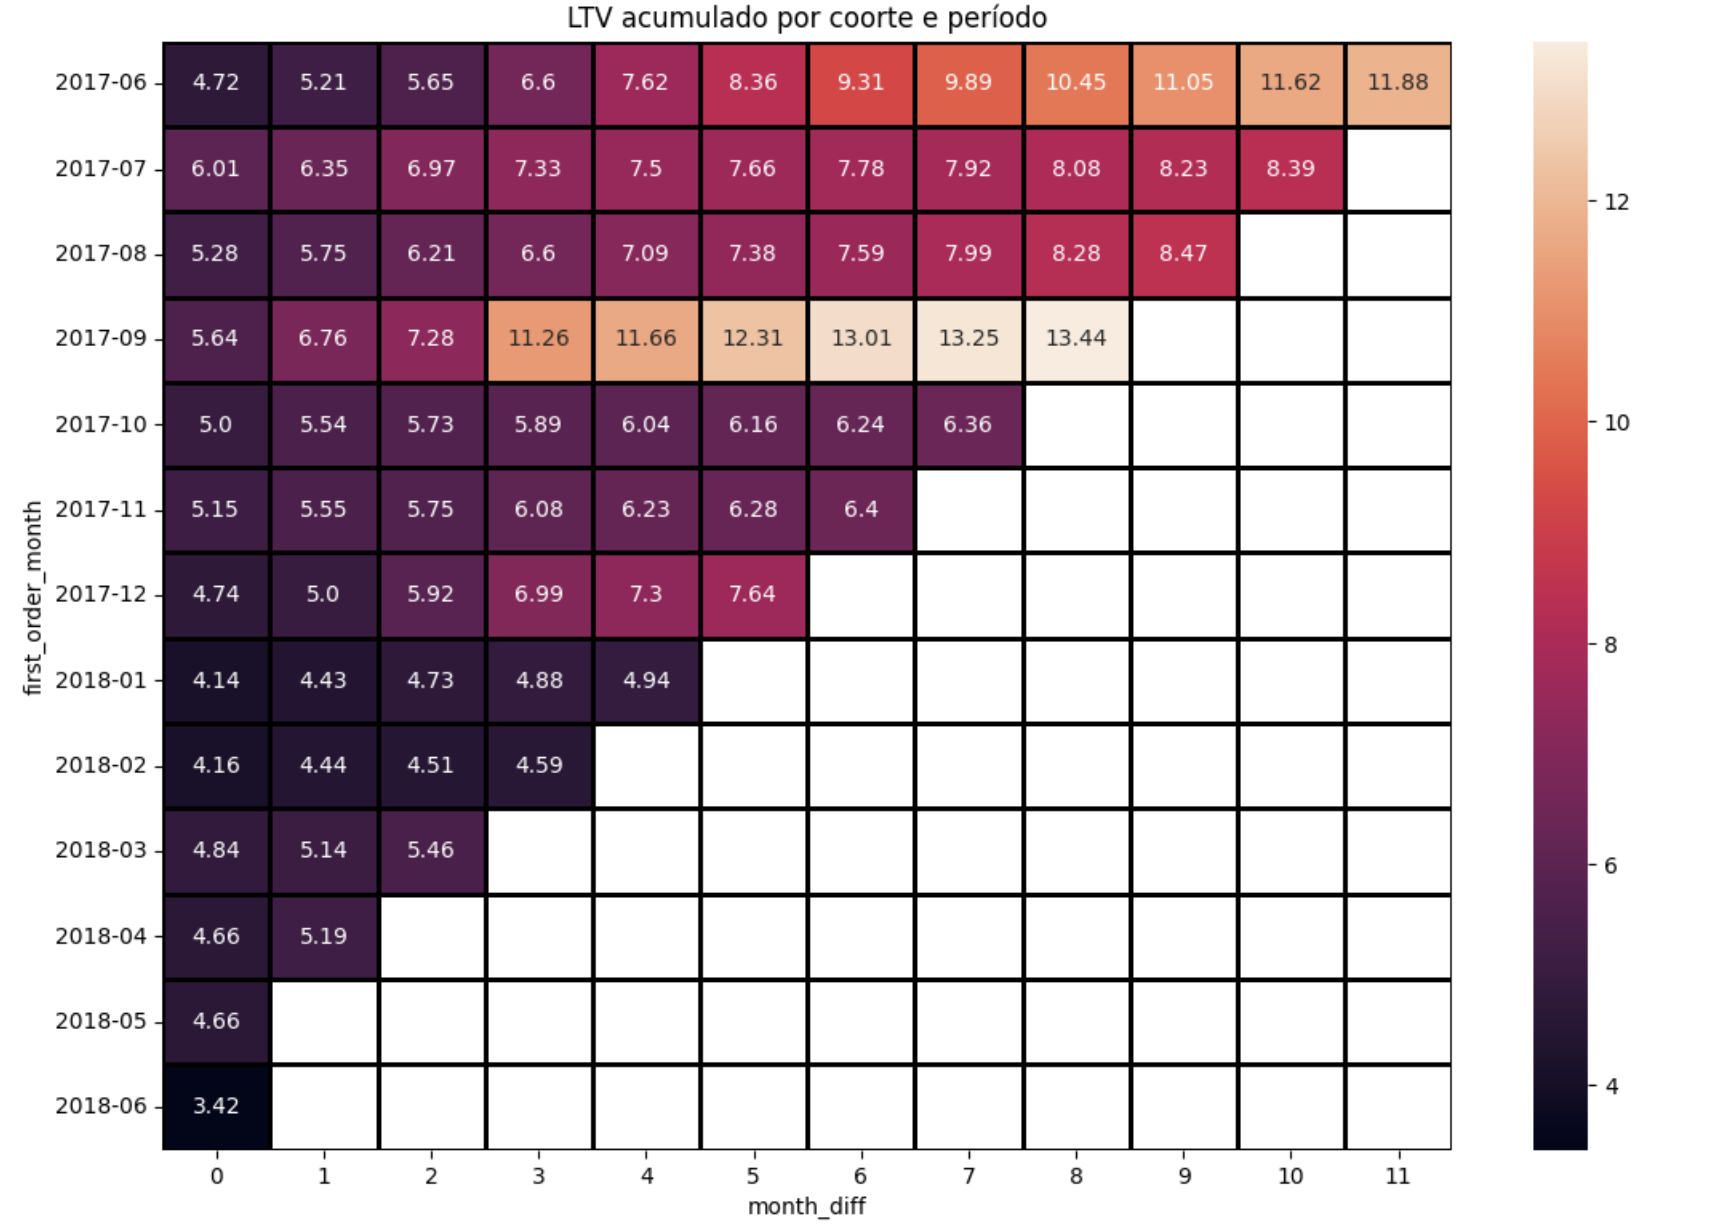

</div>

In [144]:
orders['first_order_month'] = orders["first_order_month"]

In [147]:
orders.head(5)

,Buy Ts,Revenue,Uid,order_month,first_order_month,month_diff,n_buyers,ltv
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06,0,2023,0.008403
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06,0,2023,0.000272
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06,0,2023,0.000183
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06,0,2023,0.000272
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06,0,2023,0.000183


In [148]:
costs = pd.read_csv('/datasets/costs_us.csv')

In [149]:
costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [150]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d %H:%M:%S')
costs['month'] = costs['dt'].dt.to_period('M')

In [151]:
costs.dtypes

source_id             int64
dt           datetime64[ns]
costs               float64
month             period[M]
dtype: object

In [152]:
costs['source_id'] = costs['source_id'].astype('category')

In [153]:
# Custo Total
total_costs = costs['costs'].sum()


In [154]:
print("Custo Total=", "$",total_costs)

Custo Total= $ 329131.62


In [155]:
costs_by_source = costs.groupby('source_id')['costs'].sum()
first_purchase['date'] = pd.to_datetime(first_purchase['Buy Ts']).dt.normalize()

In [156]:
costs_by_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [157]:
costs_over_time = costs.groupby('dt')['costs'].sum()

In [158]:
costs_over_time

dt
2017-06-01     735.26
2017-06-02     721.19
2017-06-03     450.85
2017-06-04     761.16
2017-06-05     821.44
               ...   
2018-05-27     532.87
2018-05-28     619.44
2018-05-29     784.79
2018-05-30    1183.00
2018-05-31    2153.70
Name: costs, Length: 364, dtype: float64

In [159]:
monthly_costs = costs.groupby('month')['costs'].sum()


In [160]:
monthly_costs.head()

month
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
Freq: M, Name: costs, dtype: float64

In [161]:
top_sources_by_day = costs.sort_values(['dt', 'costs'], ascending=[True, False]).drop_duplicates('dt').rename(columns={'dt': 'date'})
top_sources_by_day.head()

,source_id,date,costs,month
726,3,2017-06-01,349.38,2017-06
727,3,2017-06-02,314.22,2017-06
728,3,2017-06-03,196.12,2017-06
729,3,2017-06-04,389.87,2017-06
730,3,2017-06-05,424.47,2017-06


In [162]:
first_purchase_with_source = first_purchase.merge(top_sources_by_day[['date', 'source_id']], on='date')
first_purchase_with_source

,Uid,Buy Ts,date,source_id
0,313578113262317,2018-01-03,2018-01-03,3
1,284359495106072006,2018-01-03,2018-01-03,3
2,285612533052941765,2018-01-03,2018-01-03,3
3,308245131895937214,2018-01-03,2018-01-03,3
4,340630239954636016,2018-01-03,2018-01-03,3
...,...,...,...,...
36517,17223770569121096738,2017-07-16,2017-07-16,3
36518,17225514033524461814,2017-07-16,2017-07-16,3
36519,17356449299581182403,2017-07-16,2017-07-16,3
36520,17483088794779079562,2017-07-16,2017-07-16,3


In [163]:
clients_per_source = first_purchase_with_source.groupby('source_id')['Uid'].nunique().sort_values(ascending=False)
print("Clientes por origem:")
print(clients_per_source)

Clientes por origem:
source_id
3     31806
4      3960
5       538
2       218
1         0
9         0
10        0
Name: Uid, dtype: int64


In [164]:
# Acima, temos quantos clientes foram “trazidos” por cada canal.Os canais 1, 9 e 10 não tem apresentado resultados significativos, ou seja, a empresa investiu dinheiro, mas não trouxe ninguém.

In [165]:
# CAC = total investido / total de clientes adquiridos
cac_per_source = (costs_by_source / clients_per_source).dropna().sort_values(ascending=False)

print("CAC por origem:")
print(cac_per_source)

CAC por origem:
source_id
1            inf
9            inf
10           inf
2     196.357982
5      96.202788
4      15.422626
3       4.443238
dtype: float64


In [166]:
# ROI total
roi_total = (total_revenue - total_costs) / total_costs

print(f"Receita total: ${total_revenue:,.2f}")
print(f"Custo total: ${total_costs:,.2f}")
print(f"ROI total: {roi_total:.2%}")

Receita total: $252,057.20
Custo total: $329,131.62
ROI total: -23.42%


In [167]:
# mesclar com os dados de custos
costs['costs_month'] = pd.to_datetime(costs['dt']).dt.to_period('M')
CAC_por_mes = pd.merge(
    costs.groupby('costs_month').agg({'costs': 'sum'}),
    orders.groupby('first_order_month').agg({'Uid': 'nunique'}),  # Número de usuários únicos
    left_index=True,
    right_index=True
)


In [186]:
CAC_por_mes.head()

,costs,Uid,cac
2017-06,18015.00,2023,8.905091
2017-07,18240.59,1923,9.485486
2017-08,14790.54,1370,10.796015
2017-09,24368.91,2581,9.441654
2017-10,36322.88,4340,8.369327


In [187]:
# 6. Calcular o Custo de Aquisição (CAC)
CAC_por_mes['cac'] = CAC_por_mes['costs'] / CAC_por_mes['Uid']


In [190]:
CAC_por_mes

,costs,Uid,cac
2017-06,18015.00,2023,8.905091
2017-07,18240.59,1923,9.485486
2017-08,14790.54,1370,10.796015
2017-09,24368.91,2581,9.441654
2017-10,36322.88,4340,8.369327
2017-11,37907.88,4081,9.288870
2017-12,38315.35,4383,8.741809
2018-01,33518.52,3373,9.937302
2018-02,32723.03,3651,8.962758
2018-03,30415.27,3533,8.608907


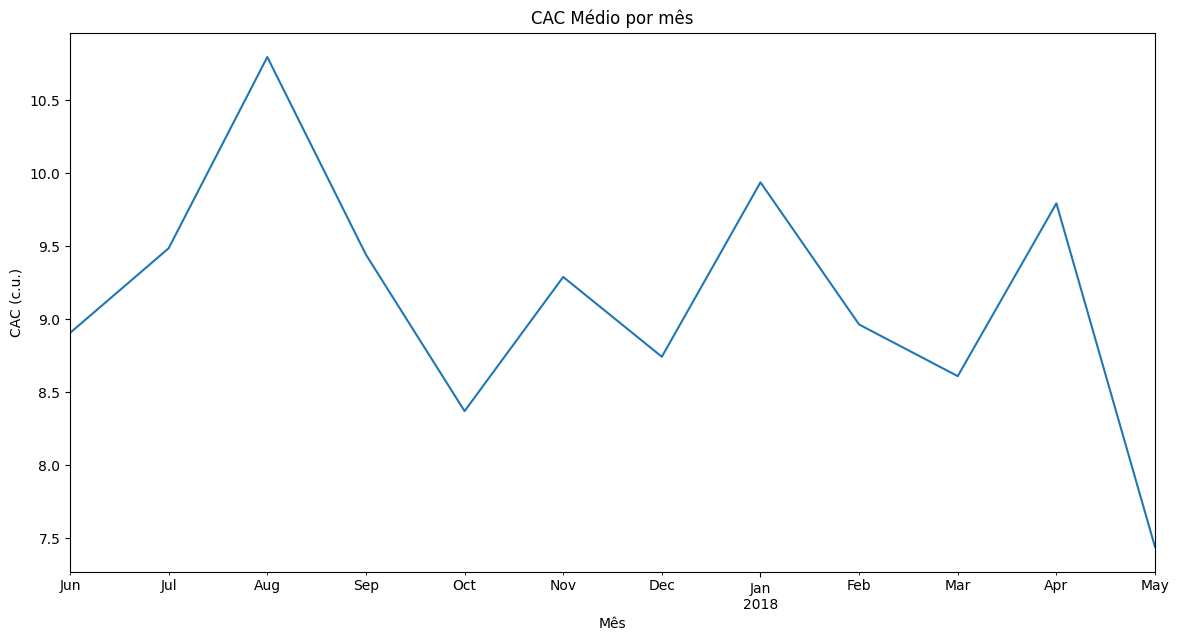

In [171]:
# 7. Plotar o CAC ao longo do tempo
CAC_por_mes['cac'].plot(figsize=(14,7), title='CAC Médio por mês', xlabel='Mês', ylabel='CAC (c.u.)')
plt.show()


In [172]:
cohorts = orders.groupby(['first_order_month', 'order_month']).agg(
    revenue=('Revenue', 'sum'),
    n_buyers=('Uid', 'nunique')  # Compradores únicos
).reset_index()


In [173]:
cohorts

,first_order_month,order_month,revenue,n_buyers
0,2017-06,2017-06,9557.49,2023
1,2017-06,2017-07,981.82,61
2,2017-06,2017-08,885.34,50
3,2017-06,2017-09,1931.30,54
4,2017-06,2017-10,2068.58,88
...,...,...,...,...
74,2018-03,2018-05,1114.87,58
75,2018-04,2018-04,10600.69,2276
76,2018-04,2018-05,1209.92,69
77,2018-05,2018-05,13925.76,2988


In [174]:
cohorts['cohort_lifetime'] = (
    (cohorts['order_month'].dt.year - cohorts['first_order_month'].dt.year) * 12 +
    (cohorts['order_month'].dt.month - cohorts['first_order_month'].dt.month)
)


In [175]:
cohorts = cohorts.sort_values(['first_order_month', 'cohort_lifetime'])

In [176]:
cost_per_month = costs.groupby('costs_month').agg(costs=('costs', 'sum')).reset_index()

In [177]:
# Fazer o merge dos dados de custo com as coortes com base no 'order_month'
cohorts = pd.merge(cohorts, cost_per_month, left_on='order_month', right_on='costs_month')


In [178]:
# 12. Calcular CAC, LTV e ROMI
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']


In [184]:
cohorts.head()

,first_order_month,order_month,revenue,n_buyers,cohort_lifetime,costs_month,costs,cac,ltv,romi
0,2017-06,2017-06,9557.49,2023,0,2017-06,18015.00,8.905091,4.724414,0.530530
1,2017-06,2017-07,981.82,61,1,2017-07,18240.59,299.026066,16.095410,0.053826
2,2017-07,2017-07,11557.65,1923,0,2017-07,18240.59,9.485486,6.010218,0.633623
3,2017-06,2017-08,885.34,50,2,2017-08,14790.54,295.810800,17.706800,0.059859
4,2017-07,2017-08,644.61,52,1,2017-08,14790.54,284.433462,12.396346,0.043583


In [179]:
# 13. Criar uma tabela dinâmica para o ROMI ao longo da duração da coorte
romi_pivot = cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean')


In [183]:
romi_pivot.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.530530,0.053826,0.059859,0.079253,0.056950,0.039251,0.050182,0.035102,0.034201,0.040293,0.051848,0.023381
2017-07,0.633623,0.043583,0.049204,0.019005,0.008968,0.007832,0.006896,0.008334,0.010194,0.012695,0.013470,NaN
2017-08,0.488747,0.026535,0.017293,0.014141,0.017665,0.011589,0.008820,0.018243,0.017961,0.011588,NaN,NaN
2017-09,0.597833,0.079412,0.035468,0.267817,0.030844,0.051037,0.059538,0.028156,0.021369,NaN,NaN,NaN
2017-10,0.597866,0.061338,0.021679,0.020347,0.020101,0.017175,0.016515,0.022549,NaN,NaN,NaN,NaN


In [180]:
# 14. Calcular a soma cumulativa de ROMI para cada coorte
cum_sum_romi = romi_pivot.cumsum(axis=1).round(2)


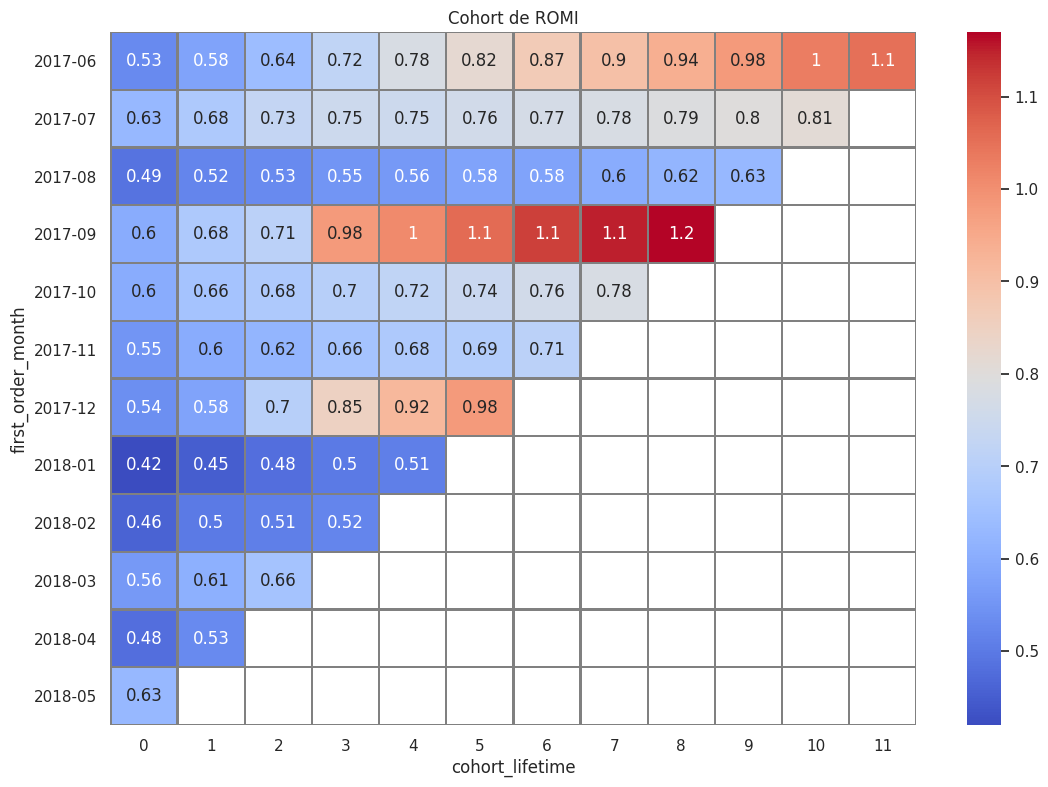

In [181]:
# 15. Plotar o heatmap de ROMI
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohort de ROMI')
sns.heatmap(cum_sum_romi, annot=True, linewidths=1, linecolor='gray', cmap='coolwarm')
plt.show()


In [ ]:
# Conclusões:
#      1. O LTV está muito abaixo do CAC

#     LTV: $6.90

#     CAC por mês: todos os meses acima de $8.00

#     CAC por origem: só a origem 3 tem CAC < LTV

#     Isso significa que a empresa perde dinheiro a cada cliente adquirido
#     na maioria dos canais e meses.

#      2.  Algumas fontes não converteram ninguém

#    source_id 1, 9, 10: têm custos mas nenhum cliente convertido

#    Resultado: CAC infinito → gasto desperdiçado

#     3. Só a origem 3 é rentável

#    CAC de $4.44 < LTV de $6.90

#    A única origem em que a receita por cliente supera o custo de aquisição

#     Recomendações:

#    Reduzir investimento nas origens 1, 9, 10 — são ineficientes

#    Aumentar investimento na origem 3 — é rentável

#    Investigar se é possível:

#        Aumentar o ticket médio

#        Aumentar a frequência de compras

#        Reduzir CAC com melhores campanhas e segmentação



<div class="alert alert-block alert-danger">
<b> Comentário: </b> <a class="tocSkip"></a>

Aqui precisamos calcular o `ROI` / `ROMI` também por cohort, pois os grupos podem ter valores diferentes de `LTV` e isso pode influenciar no resultado final. O cálculo da métrica pode ser feito como algo assim:
    
```python
your_agg_df['romi'] = your_agg_df['ltv'] / your_agg_df['cac']
```

O resultado pode ser apresentado como uma `pivot_table` por `cohort`, conforme você fez para outros indicadores em seu projeto. Adicionalmente, você pode analisar o `ROMI` por origem.
    
```markdown
|                   |      |    |    |   |   |   |   |   |   |   |    |    |
|-------------------|------|----|----|---|---|---|---|---|---|---|----|----|
| cohort            | 0    | 1  | 2  | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |
| first_order_month |      |    |    |   |   |   |   |   |   |   |    |    |
| 2017-06           | 0.53 | .. | .. |   |   |   |   |   |   |   |    |    |
| 2017-07           | 0.63 | .. |    |   |   |   |   |   |   |   |    |    |
| 2017-08           | 0.49 | .. |    |   |   |   |   |   |   |   |    |    |
| 2017-09           | 0.60 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-10           | 0.60 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-11           | 0.55 |    |    |   |   |   |   |   |   |   |    |    |
| 2017-12           | 0.54 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-01           | 0.42 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-02           | 0.46 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-03           | 0.56 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-04           | 0.48 |    |    |   |   |   |   |   |   |   |    |    |
| 2018-05           | 0.63 |    |    |   |   |   |   |   |   |   |    |    |
 ```
    
Exemplo de código:    
```python
cohorts = orders_log.groupby(['first_order_month', 'order_month']).agg(revenue=('revenue','sum'), n_buyers=('user_id', 'nunique')).reset_index()

# calcular a vida útil do coorte
cohorts['cohort_lifetime'] = (cohorts['order_month'] - cohorts['first_order_month']).apply(lambda x: x.n)

# ordenar o dataframe por 'first_order_month' e 'cohort_lifetime'
cohorts = cohorts.sort_values(['first_order_month', 'cohort_lifetime'])

# mesclar com os dados de custos
costs['costs_month'] = pd.to_datetime(costs['ad_date']).dt.to_period('M')
cost_per_month = costs.groupby('costs_month').agg(costs=('costs', 'sum')).reset_index()

cohorts = pd.merge(cohorts, cost_per_month, left_on='order_month', right_on='costs_month')

# calcular cac, ltv e romi
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']

# criar a tabela dinâmica com 'cohort_lifetime' como colunas
romi_pivot = cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean').round(2)

# calcular a soma acumulada usando o comando cumsum
...continue o código
```

</div>

<div class="alert alert-block alert-danger">
<b> Comentário v2: </b> <a class="tocSkip"></a>


O código ainda necessita de ajustes. Vou passar um passo a passo mais detalhado de como resolver: 

```python

## Código gerado pela revisora - Repare nos agrupamentos utilizando groupby 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ler os dados (já no seu caso)
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# Renomeando as colunas em 'orders'
orders = orders.rename(columns={
    'Buy Ts': 'buy_ts',        # Renomeia 'Buy Ts' para 'buy_ts'
    'Revenue': 'revenue',      # Renomeia 'Revenue' para 'revenue'
    'Uid': 'uid'               # Renomeia 'Uid' para 'uid'
})


# 2. Converter as colunas relevantes para o formato datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# 3. Criar as colunas 'order_month' e 'first_order_month' em orders
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
orders['first_order_month'] = orders.groupby('uid')['order_month'].transform('min')

# 4. Agrupar os dados de custos e pedidos por mês
costs['costs_month'] = costs['dt'].dt.to_period('M')

# 5. Calcular o CAC por mês fazendo o merge entre custos e pedidos
CAC_por_mes = pd.merge(
    costs.groupby('costs_month').agg({'costs': 'sum'}),
    orders.groupby('first_order_month').agg({'uid': 'nunique'}),  # Número de usuários únicos
    left_index=True,
    right_index=True
)

# 6. Calcular o Custo de Aquisição (CAC)
CAC_por_mes['cac'] = CAC_por_mes['costs'] / CAC_por_mes['uid']

# 7. Plotar o CAC ao longo do tempo
CAC_por_mes['cac'].plot(figsize=(14,7), title='CAC Médio por mês', xlabel='Mês', ylabel='CAC (c.u.)')
plt.show()

# 8. Criar coortes com base no primeiro mês de pedido e calcular receita e número de compradores
cohorts = orders.groupby(['first_order_month', 'order_month']).agg(
    revenue=('revenue', 'sum'),
    n_buyers=('uid', 'nunique')  # Compradores únicos
).reset_index()

# 9. Calcular a duração da coorte em meses
cohorts['cohort_lifetime'] = (
    (cohorts['order_month'].dt.year - cohorts['first_order_month'].dt.year) * 12 +
    (cohorts['order_month'].dt.month - cohorts['first_order_month'].dt.month)
)

# 10. Ordenar as coortes por 'first_order_month' e 'cohort_lifetime'
cohorts = cohorts.sort_values(['first_order_month', 'cohort_lifetime'])

# 11. Agrupar os dados de custos por mês e fazer o merge com as coortes
cost_per_month = costs.groupby('costs_month').agg(costs=('costs', 'sum')).reset_index()

# Fazer o merge dos dados de custo com as coortes com base no 'order_month'
cohorts = pd.merge(cohorts, cost_per_month, left_on='order_month', right_on='costs_month')

# 12. Calcular CAC, LTV e ROMI
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']

# 13. Criar uma tabela dinâmica para o ROMI ao longo da duração da coorte
romi_pivot = cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean')

# 14. Calcular a soma cumulativa de ROMI para cada coorte
cum_sum_romi = romi_pivot.cumsum(axis=1).round(2)

# 15. Plotar o heatmap de ROMI
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohort de ROMI')
sns.heatmap(cum_sum_romi, annot=True, linewidths=1, linecolor='gray', cmap='coolwarm')
plt.show()

# (opcional) readicionando código anterior para manter códigos posteriores funcionais
orders['order_month'] = orders['buy_ts'].dt.to_period('M')
orders['first_order_month'] = orders.groupby('uid')['order_month'].transform('min')
# 8. Criar coortes com base no primeiro mês de pedido e calcular receita e número de compradores
cohorts = orders.groupby(['first_order_month', 'order_month']).agg(
    revenue=('revenue', 'sum'),
    n_buyers=('uid', 'nunique')  # Compradores únicos
).reset_index()

margin_rate = 0.4

cohorts['gp'] = cohorts['revenue'] * margin_rate
cohorts['age'] = (cohorts['order_month'] - cohorts['first_order_month'])#.apply(attrgetter('n'))
cohorts['ltv'] = cohorts['gp'] / cohorts['n_buyers']


```